In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Define test directory & model path
test_dir = r'C:\Users\Shashank Mahato\Desktop\Semester-8\Project Phase-2\7-smaller-split-augmented data\test'
model_path = r"C:\Users\Shashank Mahato\Desktop\Semester-8\Project Phase-2\7-codes-smaller-split-augmented data\Saved-models\SE_DenseNet121_model.h5"

# Load trained model
model = tf.keras.models.load_model(model_path)

In [6]:
# Prepare the test data
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 700 images belonging to 7 classes.


In [7]:
# Evaluate model on test dataset
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Predict test data
test_generator.reset()  # Ensure the generator is reset before prediction
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

c:\Users\Shashank Mahato\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9240 - loss: 0.3929
Test Accuracy: 85.14%
22/22 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step


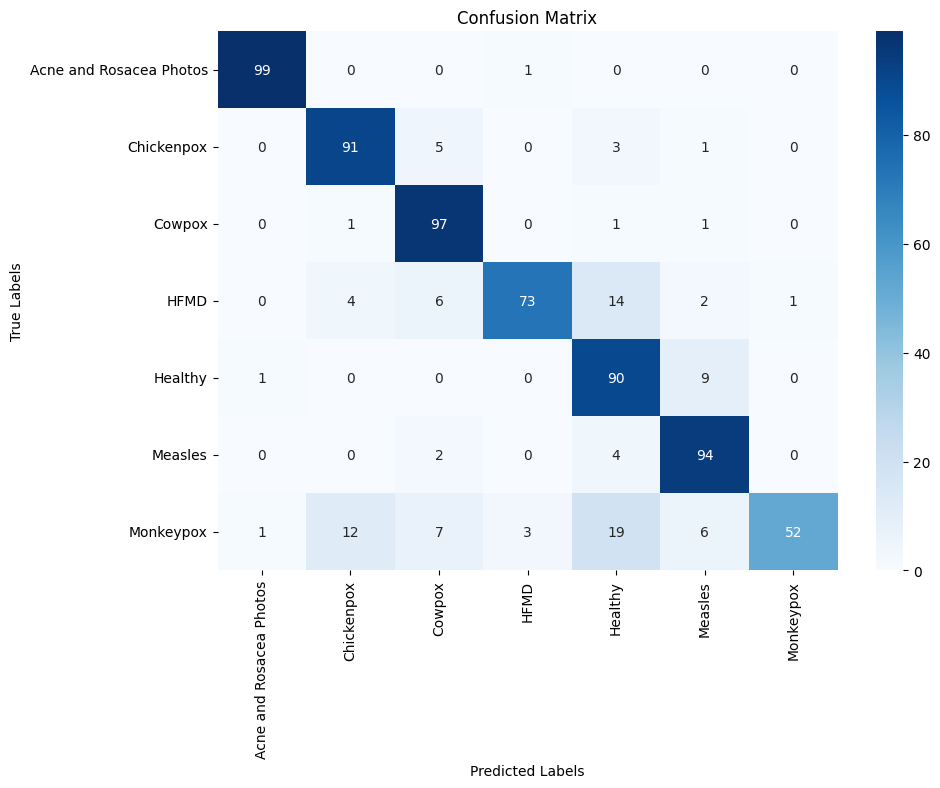

In [8]:
# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
class_labels = list(test_generator.class_indices.keys())

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Print Classification Report
print('\nClassification Report')
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Classification Report
                         precision    recall  f1-score   support

Acne and Rosacea Photos       0.98      0.99      0.99       100
             Chickenpox       0.84      0.91      0.88       100
                 Cowpox       0.83      0.97      0.89       100
                   HFMD       0.95      0.73      0.82       100
                Healthy       0.69      0.90      0.78       100
                Measles       0.83      0.94      0.88       100
              Monkeypox       0.98      0.52      0.68       100

               accuracy                           0.85       700
              macro avg       0.87      0.85      0.85       700
           weighted avg       0.87      0.85      0.85       700

